In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from tqdm import tqdm
from einops import rearrange, repeat
from omegaconf import OmegaConf

from diffusers import DDIMScheduler, ControlNetModel

from masactrl.diffuser_utils import MasaCtrlPipeline, MasaCtrlControlNetPipeline, StableDiffusionPipeline
from masactrl.masactrl_utils import AttentionBase
from masactrl.masactrl_utils import regiter_attention_editor_diffusers

from torchvision.utils import save_image
from torchvision.io import read_image
from pytorch_lightning import seed_everything

torch.cuda.set_device(6)  # set the GPU device

/mnt/hdd/hbchoe/anaconda3/envs/Masactrl2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Note that you may add your Hugging Face token to get access to the models
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model_path = "xyn-ai/anything-v4.0"
model_path = "/mnt/hdd/hbchoe/workspace/MasaCtrl/dreambooth/dreambooth_musk2"
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose")

# model = MasaCtrlPipeline.from_pretrained(model_path, scheduler=scheduler, cross_attention_kwargs={"scale": 0.5}).to(device)
model = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16   , scheduler=scheduler).to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'image_encoder': [None, None]} were passed to StableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'image_encoder': [None, None]} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'a

In [3]:
print(torch.cuda.current_device())

6


In [4]:
import matplotlib.pyplot as plt
def plot_image(image, title=None):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

100%|██████████| 50/50 [00:02<00:00, 17.35it/s]


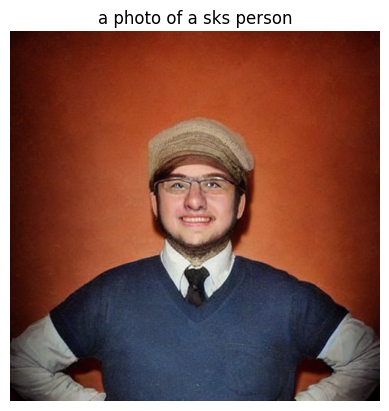

In [29]:

prompt = "a photo of a sks person"

image = model(prompt, num_inference_steps=50, guidance_scale=7.5, output_type="tensor").images[0]

# image = image.cpu().permute(1, 2, 0).numpy()
image = (image * 255).astype(np.uint8)
plot_image(image, title=prompt)